In [63]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [9]:
import pandas as pd
import numpy as np

# 전처리

In [ ]:
# from google.colab import files
# data = files.upload()

In [ ]:



df_ingi = pd.read_csv('ingi_content.csv')

df_noingi = pd.read_csv('noingi_content.csv', encoding='cp949')

df_noingi.drop(df_noingi.columns[0],axis=1,inplace=True)

df_ingi.drop(df_ingi.columns[0],axis=1,inplace=True)
df_noingi=df_noingi[df_noingi['score']<=3]
df_ingi=df_ingi[df_ingi['score']>=4]


In [ ]:
df_noingi.drop(df_noingi.columns[0],axis=1,inplace=True)
df_ingi.drop(df_ingi.columns[0],axis=1,inplace=True)
df_noingi=df_noingi[df_noingi['score']<=3]
df_ingi=df_ingi[df_ingi['score']>=4]


,score,content
0,5,우선 엄청 편하다 오래된의자 이제안녕임<br>시디즈같은거 살까했는데 어차피 8할은 ...
1,4,식탁의자로 컴퓨터 의자를 대신해서<br><br>사용하고 있었는데 장시간 컴퓨터를 하...
2,4,빠른배송으로 잘도착했습니다<br>근데 몇가지 단점이라기보단 개선했으면 좋았겠다하는점...
3,5,지인분이 쓴다길래 저도 샀습니다<br>초기 불량이 조금 있다는 얘기를 듣고 걱정했는...
4,5,"왜 게이밍 의자 중에 베스트1인지 알겠네요.<br>굳이 게이밍용이 필요하다기보단, ..."
...,...,...
43591,5,빠른 배송과 손쉬운 설치 <br>앉았을때 착좌감도 너무 좋네요 ㅎㅎ<br>게임하기 ...
43592,5,아버지 선물해드렸는데 무지 좋아하시네요ㅎ<br>조립도 간편하고 편하다고하시네요~!
43593,5,배송빠르고 실수없이 왔어요 감사합니다
43594,5,배송빠르고 의자완전편안합니다 적극추천합니다~


# 토픽모델링

한두개의 문서가 아니라 수천개의 경향성을 파악해야 한다면?

1. 토픽 모델이란?   
문서집합의 추상적인 "주제"를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 중 하나입니다.   
(https://ko.wikipedia.org/wiki/%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8)

2. 문헌 내에 어떤 주제가 들어있고, 주제 간의 비중이 어떤지는 문헌 집합 내의 단어 통계를 수학적으로 분석함으로써 알아 낼 수 있습니다.이러한 이유로 토픽 모델은 또한 확률적 토픽 모델이라고도 불립니다. 


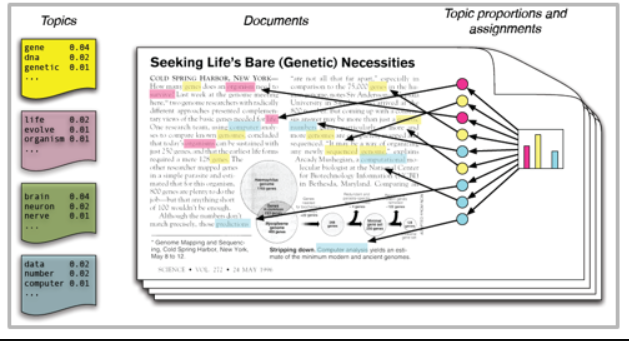

여러 토픽모델 알고리즘 중 LDA를 활용하여 실습해보겠습니다. 

LDA(Latent Dirichlet allocation, 잠재 디리클레 할당)란?    
- 자연어 처리에서 잠재 디리클레 할당(Latent Dirichlet allocation, LDA)은 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지를 서술하는 확률적 토픽 모델 기법 중 하나로, 
- 미리 알고 있는 주제별 단어수 분포를 바탕으로, 주어진 문서에서 발견된 단어수 분포를 분석함으로써 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측하는 모델입니다. 
(https://ko.wikipedia.org/wiki/%EC%9E%A0%EC%9E%AC_%EB%94%94%EB%A6%AC%ED%81%B4%EB%A0%88_%ED%95%A0%EB%8B%B9)

LDA 절차
0. 데이터 이해
1. 텍스트 전처리
2. TF-IDF 행렬 만들기
3. LDA 학습 및 결과분석

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

### 1. 텍스트 전처리(Text Preprocessing) 
- 텍스트를 자연어 처리를 위해 용도에 맞도록 사전에 표준화하는 작업입니다. 
- 텍스트 내 정보를 유지하고, 중복을 제거하여 분석 효율성을 높이기 위해 전처리를 수행합니다. 
- 토큰화, 품사 부착, 개체명 인식,원형복원, 불용어 처리 등이 있습니다. 

In [ ]:
df_ingi,df_noingi

(                                                 content
 0      우선 엄청 편하다 오래된의자 이제안녕임<br>시디즈같은거 살까했는데 어차피 8할은 ...
 1      식탁의자로 컴퓨터 의자를 대신해서<br><br>사용하고 있었는데 장시간 컴퓨터를 하...
 2      빠른배송으로 잘도착했습니다<br>근데 몇가지 단점이라기보단 개선했으면 좋았겠다하는점...
 3      지인분이 쓴다길래 저도 샀습니다<br>초기 불량이 조금 있다는 얘기를 듣고 걱정했는...
 4      왜 게이밍 의자 중에 베스트1인지 알겠네요.<br>굳이 게이밍용이 필요하다기보단, ...
 ...                                                  ...
 43591  빠른 배송과 손쉬운 설치 <br>앉았을때 착좌감도 너무 좋네요 ㅎㅎ<br>게임하기 ...
 43592      아버지 선물해드렸는데 무지 좋아하시네요ㅎ<br>조립도 간편하고 편하다고하시네요~!
 43593                               배송빠르고 실수없이 왔어요 감사합니다
 43594                           배송빠르고 의자완전편안합니다 적극추천합니다~
 43595                             의자 정말 편하고 견고하고 좋습니당!!!
 
 [38310 rows x 1 columns],
                                                content
 0    <br><br>좋게말하면 가성비고.. 그냥 내다버린 7만원.. <br><br><br...
 3    와이프랑 같이 사용하기 위해서 레드/블루 색상 2가지 주문햇는데 레드색상은 최상의 ...
 5    a체어 신청했는데 재고가 없다고 12만원짜리로 바꿔준다고 해서 와일드체어가 왔습니다...
 6    처음에 물건중에 부품이 잘못오고 누락된게 있는데 그다음에 추가 배송온것도 잘못된 

In [ ]:
# 한글, 영어, 숫자(소수와 퍼센트) 만 남기고 기타 특수문자들을 제거합니다. 
import re

def text_cleaning(doc):
  text = re.sub('[^가-힣ㄱ-ㅣA-Z|0-9.%]', ' ', string = doc)
  return text

In [ ]:
# 원문
doc = df_ingi['content'].iloc[0]
doc

'우선 엄청 편하다 오래된의자 이제안녕임<br>시디즈같은거 살까했는데 어차피 8할은 게임용의자로 앉을거같아서 처음으로 게이밍의자 너로정해따!<br>설명서가 잘 나와있어서 그냥 틀린그림찾기하듯이 매의눈으로 관찰하면 설치할수잇음+가렌의 힘도 필요함 아근데 설명서 그 물건사진으로 보여주면 더 좋을거같음 그림으로그려진거말고 기름칠같은거나 뭔가 나사부분조여지는거 볼때 그림도 알아보기쉽지만 그냥...사진같은게 더 이해가잘올듯<br>바퀴구멍을 낄때가 제일 고난의시간이었음 아무리 쑤셔넣고 돌려도 안들어가지는데 이럴때쓰라고 생존하고계신 남친을 이용했더니 잘넣음 (우쭐해하는모습 꼴보기싫엇지만 바퀴없는의자는 안되니까 넘어가줌)<br>의자뒤로 젖힐때 소리는 게임에집중하다가 들으면 딸꾹질할정도로 놀람-친구놀려줄때 사용해도될듯<br>푹신하고 편한데 단점은 진짜 무겁고 무거움<br>피방알바햇던적잇엇는데 그의자는 가벼웟는데 이건무거웟지만 내무게도 무거우니 날견디려면 이런 튼튼이가 맞을듯<br>첨으로 게이밍용 삿는데 정말 뿌듯함(돈쓴보람을느낀달까..헛소리하지말라는 잔소리들을수잇다)<br>아쉬운건 팔부분도 뭔가 좀 부드러웟으면 좋겟음 올리는기능도잇는데 그냥안쓸듯(이런거원하면 안마기를사야하나)<br>아그리고 여름에 좀 땀찰거같음 등부분이나 엉덩이부분 지금도 오래기대고잇으면 약간 답답함 통풍잘되는 대나무 걸어둬야할듯 대나무짱이다<br>롤열심히할게요 봇듀원딜구함 난 그 유명한 브론즈&hearts;'

In [ ]:
# 한글,영어, 숫자만 남은 문서입니다. 
clean_doc = text_cleaning(doc)
clean_doc

'우선 엄청 편하다 오래된의자 이제안녕임    시디즈같은거 살까했는데 어차피 8할은 게임용의자로 앉을거같아서 처음으로 게이밍의자 너로정해따     설명서가 잘 나와있어서 그냥 틀린그림찾기하듯이 매의눈으로 관찰하면 설치할수잇음 가렌의 힘도 필요함 아근데 설명서 그 물건사진으로 보여주면 더 좋을거같음 그림으로그려진거말고 기름칠같은거나 뭔가 나사부분조여지는거 볼때 그림도 알아보기쉽지만 그냥...사진같은게 더 이해가잘올듯    바퀴구멍을 낄때가 제일 고난의시간이었음 아무리 쑤셔넣고 돌려도 안들어가지는데 이럴때쓰라고 생존하고계신 남친을 이용했더니 잘넣음  우쭐해하는모습 꼴보기싫엇지만 바퀴없는의자는 안되니까 넘어가줌     의자뒤로 젖힐때 소리는 게임에집중하다가 들으면 딸꾹질할정도로 놀람 친구놀려줄때 사용해도될듯    푹신하고 편한데 단점은 진짜 무겁고 무거움    피방알바햇던적잇엇는데 그의자는 가벼웟는데 이건무거웟지만 내무게도 무거우니 날견디려면 이런 튼튼이가 맞을듯    첨으로 게이밍용 삿는데 정말 뿌듯함 돈쓴보람을느낀달까..헛소리하지말라는 잔소리들을수잇다     아쉬운건 팔부분도 뭔가 좀 부드러웟으면 좋겟음 올리는기능도잇는데 그냥안쓸듯 이런거원하면 안마기를사야하나     아그리고 여름에 좀 땀찰거같음 등부분이나 엉덩이부분 지금도 오래기대고잇으면 약간 답답함 통풍잘되는 대나무 걸어둬야할듯 대나무짱이다    롤열심히할게요 봇듀원딜구함 난 그 유명한 브론즈        '

- 품사 태깅 클래스 비교
https://konlpy.org/ko/latest/morph/

- KoNLPy에는 품사 태깅을 하기 위한 옵션이 여럿 있는데, 이들은 모두 문구(phrase)를 입력받아 태깅된 형태소를 출력하는 동일한 입출력 구조를 가집니다  

- 형태소 분석 이란 형태소를 비롯하여, 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다양한 언어적 속성의 구조를 파악하는 것입니다.
- 품사 태깅 은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일입니다. 

  예를 들어,   
  가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN


konlpy와 mecab을 설치해봅시다. 
- Konlpy는 KoNLPy란 KoNLPy는 한국어 정보처리를 위한 파이썬 패키지 입니다. 자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지입니다.

- MeCab은 품사 태깅 클래스 중 하나로 konlpy와 별도로 설치가 필요합니다. 

In [6]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [ ]:
# Mecab 토큰화 
from konlpy.tag import Mecab

tokenizer = Mecab()
tokenizer.morphs(clean_doc.split('.')[0]) # 첫 문장 토큰화 

['우선',
 '엄청',
 '편하',
 '다',
 '오래',
 '된',
 '의자',
 '이제',
 '안녕',
 '임',
 '시디',
 '즈',
 '같',
 '은',
 '거',
 '살까',
 '했',
 '는데',
 '어차피',
 '8',
 '할',
 '은',
 '게임',
 '용',
 '의자',
 '로',
 '앉',
 '을',
 '거',
 '같',
 '아서',
 '처음',
 '으로',
 '게이밍',
 '의',
 '자',
 '너',
 '로',
 '정해',
 '따',
 '설명서',
 '가',
 '잘',
 '나와',
 '있',
 '어서',
 '그냥',
 '틀린',
 '그림',
 '찾',
 '기',
 '하',
 '듯이',
 '매',
 '의',
 '눈',
 '으로',
 '관찰',
 '하',
 '면',
 '설치',
 '할',
 '수',
 '잇',
 '음',
 '가렌',
 '의',
 '힘',
 '도',
 '필요',
 '함',
 '아',
 '근데',
 '설명서',
 '그',
 '물건',
 '사진',
 '으로',
 '보여',
 '주',
 '면',
 '더',
 '좋',
 '을',
 '거',
 '같',
 '음',
 '그림',
 '으로',
 '그려진',
 '거',
 '말',
 '고',
 '기름',
 '칠',
 '같',
 '은',
 '거',
 '나',
 '뭔가',
 '나사',
 '부분',
 '조여',
 '지',
 '는',
 '거',
 '볼',
 '때',
 '그림',
 '도',
 '알아보',
 '기',
 '쉽',
 '지만',
 '그냥']

In [ ]:
df_noingi['content'].iloc[0]

'<br><br>좋게말하면 가성비고.. 그냥 내다버린 7만원.. <br><br><br><em>쿠션 되게 딱딱하구요</em>(-1)<br><em>쿠션 들어있긴한대</em>; 중딩때쓰던 나무 의자보다 못합니다..<br>가운대가 볼록하쿠션? 이더 들어있는대..(-1)<br>이거때문에 오히려 더 불편하내요<br><br><br>플라스틱 성형도 별로입니다.성형 선이 너무 뚜렷하게 남아있어요<br>이정도는 봐드릴수있습니다.<br><br><br>등받이도 고정 하면 어느정도 뒤로도 밀리고그래야되는대<br>그냥 고정..<br><br><br>지지대도 되게불안하내요..얇고.. 부실해보입니다(-1)<br>힘 좀만쌔게주면 바로 부서질거같은..<br><br><br>홍보자료에서도 직접사보면 사이즈에 차이가있는듯합니다.<br>사진용으로 좋은소재 ( 반짝반짝 ) + 빅 한사이즈를 만들어서 <br>고급의자처럼보입니다만..<br>실제로 조립해보면 싸우려 처럼 보입니다.(뭐 싸구려니할말없지만요)<br>소재에서(-1) 사진(-1)<br><br><br>손잡이에도 먼지가 조금끼어있는채로왔습니다.(-1)<br><br><br>쿠션도 재대로 고정이안되서 허리쪽은 의자 틈으로 빠지고<br>목쪽 쿠션도 바닥으로 계속 쳐저서 쓸때마다 올려야합니다(-1)<br><br><br><br><br>일단 사서쓰겠지만..1년 도 못갈듯합니다.<br><br><br>요약 : 소재 프레임 등등.. 실재로 봤으면 절대로 안샀을<em>만한가격과 품질<br>가격이고 뭐고 떠나서 그냥 불편함<br><br><br>추천</em> : 아는 조카가 컴퓨터 사는대 선물용으로 이 의자 대충 버려주면 아주 좋은 퀄리티<br><br><br>배송은 지려줍니다<br> <br><br>'

In [ ]:
tokenizer = Mecab()
doc = df_noingi['content'].iloc[0]
# 텍스트 전처리
clean_doc =  text_cleaning(doc)
clean_doc

'        좋게말하면 가성비고.. 그냥 내다버린 7만원..                 쿠션 되게 딱딱하구요       1         쿠션 들어있긴한대       중딩때쓰던 나무 의자보다 못합니다..    가운대가 볼록하쿠션  이더 들어있는대..  1     이거때문에 오히려 더 불편하내요            플라스틱 성형도 별로입니다.성형 선이 너무 뚜렷하게 남아있어요    이정도는 봐드릴수있습니다.            등받이도 고정 하면 어느정도 뒤로도 밀리고그래야되는대    그냥 고정..            지지대도 되게불안하내요..얇고.. 부실해보입니다  1     힘 좀만쌔게주면 바로 부서질거같은..            홍보자료에서도 직접사보면 사이즈에 차이가있는듯합니다.    사진용으로 좋은소재   반짝반짝     빅 한사이즈를 만들어서     고급의자처럼보입니다만..    실제로 조립해보면 싸우려 처럼 보입니다. 뭐 싸구려니할말없지만요     소재에서  1  사진  1             손잡이에도 먼지가 조금끼어있는채로왔습니다.  1             쿠션도 재대로 고정이안되서 허리쪽은 의자 틈으로 빠지고    목쪽 쿠션도 바닥으로 계속 쳐저서 쓸때마다 올려야합니다  1                     일단 사서쓰겠지만..1년 도 못갈듯합니다.            요약   소재 프레임 등등.. 실재로 봤으면 절대로 안샀을    만한가격과 품질    가격이고 뭐고 떠나서 그냥 불편함            추천        아는 조카가 컴퓨터 사는대 선물용으로 이 의자 대충 버려주면 아주 좋은 퀄리티            배송은 지려줍니다             '

In [ ]:
# 품사 붙이기
token_tagged = tokenizer.pos(clean_doc)
token_tagged

[('좋', 'VA'),
 ('게', 'EC'),
 ('말', 'NNG'),
 ('하', 'XSV'),
 ('면', 'EC'),
 ('가성', 'NNG'),
 ('비고', 'NNG'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('그냥', 'MAG'),
 ('내', 'VV'),
 ('다', 'EC'),
 ('버린', 'VX+ETM'),
 ('7', 'SN'),
 ('만', 'NR'),
 ('원', 'NNBC'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('쿠션', 'NNG'),
 ('되게', 'MAG'),
 ('딱딱', 'XR'),
 ('하', 'XSA'),
 ('구요', 'EF'),
 ('1', 'SN'),
 ('쿠션', 'NNG'),
 ('들', 'VV'),
 ('어', 'EC'),
 ('있', 'VX'),
 ('긴', 'ETN+JX'),
 ('한', 'MM'),
 ('대', 'NNBC'),
 ('중', 'NNB'),
 ('딩', 'MAG'),
 ('때', 'NNG'),
 ('쓰', 'VV'),
 ('던', 'ETM'),
 ('나무', 'NNG'),
 ('의자', 'NNG'),
 ('보다', 'JKB'),
 ('못', 'MAG'),
 ('합니다', 'VV+EF'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('가운', 'NNG'),
 ('대', 'NNG'),
 ('가', 'JKS'),
 ('볼록', 'XR'),
 ('하', 'XSA'),
 ('쿠션', 'NNG'),
 ('이', 'MM'),
 ('더', 'MAG'),
 ('들', 'VV'),
 ('어', 'EC'),
 ('있', 'VX'),
 ('는대', 'EF'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('1', 'SN'),
 ('이거', 'NP'),
 ('때문', 'NNB'),
 ('에', 'JKB'),
 ('오히려', 'MAJ'),
 ('더', 'MAG'),
 ('불편', 'NNG'),
 ('하', 'XSA'),
 ('내요', 'NNP'),
 ('플라스틱

In [ ]:
nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
nouns

['가성',
 '비고',
 '쿠션',
 '쿠션',
 '나무',
 '의자',
 '가운',
 '쿠션',
 '불편',
 '내요',
 '플라스틱',
 '성형',
 '성형',
 '정도',
 '등받이',
 '고정',
 '정도',
 '고정',
 '지지대',
 '불안',
 '내요',
 '부실',
 '홍보',
 '자료',
 '사이즈',
 '차이',
 '사진',
 '소재',
 '사이즈',
 '고급',
 '의자',
 '조립',
 '싸구려',
 '소재',
 '사진',
 '손잡이',
 '먼지',
 '쿠션',
 '고정',
 '허리',
 '의자',
 '쿠션',
 '바닥',
 '저서',
 '요약',
 '소재',
 '프레임',
 '실재',
 '가격',
 '품질',
 '가격',
 '불편',
 '추천',
 '조카',
 '컴퓨터',
 '선물',
 '의자',
 '퀄리티',
 '배송',
 '지려']

In [ ]:
' '.join(nouns)

'가성 비고 쿠션 쿠션 나무 의자 가운 쿠션 불편 내요 플라스틱 성형 성형 정도 등받이 고정 정도 고정 지지대 불안 내요 부실 홍보 자료 사이즈 차이 사진 소재 사이즈 고급 의자 조립 싸구려 소재 사진 손잡이 먼지 쿠션 고정 허리 의자 쿠션 바닥 저서 요약 소재 프레임 실재 가격 품질 가격 불편 추천 조카 컴퓨터 선물 의자 퀄리티 배송 지려'

In [ ]:
# 토큰화 이후 단어 길이가 2 이상인 명사만 남기기 
# 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환
# 한국어의 경우 토큰화 과정에서 조사나 접속사 제거로 대부분의 불용어가제거 되지만 불필요한 명사나 형용사를 제거하고 싶은 경우 불용어 제거를 추가하면 됩니다. 

from konlpy.tag import Mecab

def text_preprocess(doc):
  tokenizer = Mecab()
  
  # 텍스트 전처리
  clean_doc =  text_cleaning(doc)
  
  # 품사 붙이기
  token_tagged = tokenizer.pos(clean_doc)

  # 명사추출
  nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]

  # 한 문장으로 합치기 
  # 아래에서 활용할 TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문에 join 작업을 미리 해줍니다. 
  preprocessed = ' '.join(nouns)

  return preprocessed

print('전처리 결과 확인 :')
text_preprocess(doc)

전처리 결과 확인 :


'가성 비고 쿠션 쿠션 나무 의자 가운 쿠션 불편 내요 플라스틱 성형 성형 정도 등받이 고정 정도 고정 지지대 불안 내요 부실 홍보 자료 사이즈 차이 사진 소재 사이즈 고급 의자 조립 싸구려 소재 사진 손잡이 먼지 쿠션 고정 허리 의자 쿠션 바닥 저서 요약 소재 프레임 실재 가격 품질 가격 불편 추천 조카 컴퓨터 선물 의자 퀄리티 배송 지려'

In [ ]:
import pandas as pd
import numpy as np


df_ingi = pd.read_csv('ingi_content.csv')

df_noingi = pd.read_csv('noingi_content.csv', encoding='cp949')

df_noingi.drop(df_noingi.columns[0],axis=1,inplace=True)
df_ingi.drop(df_ingi.columns[0],axis=1,inplace=True)

df_noingi=df_noingi[df_noingi['score']<=3]
df_ingi=df_ingi[df_ingi['score']>=4]

df_noingi.drop(df_noingi.columns[0],axis=1,inplace=True)
df_ingi.drop(df_ingi.columns[0],axis=1,inplace=True)


df_noingi.reset_index(inplace=True,drop=True)
df_ingi.reset_index(inplace=True,drop=True)
df_noingi,df_ingi

(                                              content
 0   <br><br>좋게말하면 가성비고.. 그냥 내다버린 7만원.. <br><br><br...
 1   와이프랑 같이 사용하기 위해서 레드/블루 색상 2가지 주문햇는데 레드색상은 최상의 ...
 2   a체어 신청했는데 재고가 없다고 12만원짜리로 바꿔준다고 해서 와일드체어가 왔습니다...
 3   처음에 물건중에 부품이 잘못오고 누락된게 있는데 그다음에 추가 배송온것도 잘못된 부...
 4   <em>제품은 괜찮고 마음에 들어요</em> 하지만 딱 제품을 받고 좀 놀랐습니다 ...
 ..                                                ...
 90                                      ㅈㄴ짜 노노오오야쳐쳐_처
 91                                      잘받았습니다 보통입니다.
 92                                       잘받았습니다 보통입니다
 93                               goodgoodgoodgoodgood
 94                                         ..........
 
 [95 rows x 1 columns],
                                                  content
 0      우선 엄청 편하다 오래된의자 이제안녕임<br>시디즈같은거 살까했는데 어차피 8할은 ...
 1      식탁의자로 컴퓨터 의자를 대신해서<br><br>사용하고 있었는데 장시간 컴퓨터를 하...
 2      빠른배송으로 잘도착했습니다<br>근데 몇가지 단점이라기보단 개선했으면 좋았겠다하는점...
 3      지인분이 쓴다길래 저도 샀습니다<br>초기 불량이 조금 있다는 얘기를 듣고 걱정했는...
 4      왜 게이밍 의자 중에 베스트1

In [ ]:
# tqdm.pandas를 활용하면 pandas내 apply 작업의 진행상황을 확인할 수 있습니다. 
from tqdm import tqdm
tqdm.pandas() 

df_noingi['content']= df_noingi['content'].progress_apply(lambda x: text_preprocess(x))
df_noingi
df_ingi['content']= df_ingi['content'].progress_apply(lambda x: text_preprocess(x))
df_ingi

100%|██████████| 38310/38310 [01:16<00:00, 498.09it/s]


,content
0,의자 시디 게임 의자 처음 게이밍 설명서 그림 관찰 설치 가렌 필요 설명서 물건 사...
1,식탁 의자 컴퓨터 의자 대신 사용 장시간 컴퓨터 허리 시작 게이밍 의자 구입 의자 ...
2,배송 도착 단점 개선 팔걸이 고정 약간 세팅 지점 이탈 좌우 각도 조절 팔꿈치 받침...
3,지인 초기 불량 얘기 걱정 역시 풍무 견적 RTX 아이폰 아이패드 전동 보드 닌텐도...
4,게이밍 의자 베스트 게이밍 필요 컴퓨터 의자 가격 일반 의자 값어치 사무 의자 성능...
...,...
38305,배송 설치 착좌 게임
38306,아버지 선물 조립
38307,배송 실수 감사
38308,배송 의자 완전 편안 적극 추천


In [7]:
# 전처리 완료된 데이터프레임을 피클파일로 저장
df_noingi.to_pickle('./noingi_tokenized.pickle')
df_noingi
df_ingi.to_pickle('./ingi_tokenized.pickle')
df_ingi

NameError: ignored

피클스 여기서 저장해서 시작!!

In [11]:
df_noingi_pickle = pd.read_pickle('./noingi_tokenized.pickle')


df_ingi_pickle= pd.read_pickle('./ingi_tokenized.pickle')

In [39]:
df_noingi_pickle

,content
0,가성 비고 쿠션 쿠션 나무 의자 가운 쿠션 불편 내요 플라스틱 성형 성형 정도 등받...
1,와이프 사용 레드 블루 색상 주문 레드 색상 최상 상품 도착 색상 의자 부분 볼트 ...
2,체어 신청 재고 와일드 체어 판매 조립 환불 생각 환불 귀차 니즘 의자 최악 의자 ...
3,처음 물건 부품 누락 다음 추가 배송 부품 누락 물건 송장 확인 물건 조립 물건 수...
4,제품 마음 제품 중고품 기스 설명서 설명서 받침 식사 앞면 뒷면 양념 자국 다음 고...
...,...
90,오오야
91,보통
92,보통
93,


In [40]:
df_ingi_pickle

,content
0,의자 시디 게임 의자 처음 게이밍 설명서 그림 관찰 설치 가렌 필요 설명서 물건 사...
1,식탁 의자 컴퓨터 의자 대신 사용 장시간 컴퓨터 허리 시작 게이밍 의자 구입 의자 ...
2,배송 도착 단점 개선 팔걸이 고정 약간 세팅 지점 이탈 좌우 각도 조절 팔꿈치 받침...
3,지인 초기 불량 얘기 걱정 역시 풍무 견적 RTX 아이폰 아이패드 전동 보드 닌텐도...
4,게이밍 의자 베스트 게이밍 필요 컴퓨터 의자 가격 일반 의자 값어치 사무 의자 성능...
...,...
38305,배송 설치 착좌 게임
38306,아버지 선물 조립
38307,배송 실수 감사
38308,배송 의자 완전 편안 적극 추천


pickle파일로 저장하면 리스트가 그대로 살아 있는 것을 확인할 수 있습니다. 


In [13]:
# 한 문장으로 join 해놓은 전처리 완료된 문장들을 공백 기준으로 분리하는 함수입니다. 

def my_tokenizer(text):
  return text.split()

In [14]:
my_tokenizer(df_noingi_pickle['content'].iloc[0])

['가성',
 '비고',
 '쿠션',
 '쿠션',
 '나무',
 '의자',
 '가운',
 '쿠션',
 '불편',
 '내요',
 '플라스틱',
 '성형',
 '성형',
 '정도',
 '등받이',
 '고정',
 '정도',
 '고정',
 '지지대',
 '불안',
 '내요',
 '부실',
 '홍보',
 '자료',
 '사이즈',
 '차이',
 '사진',
 '소재',
 '사이즈',
 '고급',
 '의자',
 '조립',
 '싸구려',
 '소재',
 '사진',
 '손잡이',
 '먼지',
 '쿠션',
 '고정',
 '허리',
 '의자',
 '쿠션',
 '바닥',
 '저서',
 '요약',
 '소재',
 '프레임',
 '실재',
 '가격',
 '품질',
 '가격',
 '불편',
 '추천',
 '조카',
 '컴퓨터',
 '선물',
 '의자',
 '퀄리티',
 '배송',
 '지려']

### 2. TF-IDF 행렬 만들기(TF-IDF(Term Frequency-Inverse Document Frequency)    
- 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.  

- TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM(문서 단어 행렬(Document-Term Matrix)) 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다.

- https://wikidocs.net/24559


In [15]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. = tfidf_noingi
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=(1, 3))
tfidf_noingi = tfidf_vect.fit_transform(raw_documents = df_noingi_pickle['content'].iloc[:95]) # 기사 개수는 95개로 조절하겠습니다

In [52]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. = tfidf_ingi
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer,ngram_range=(1, 3))
tfidf_ingi = tfidf_vect.fit_transform(raw_documents = df_ingi_pickle['content'].iloc[:38310]) # 기사 개수는 95개로 조절하겠습니다

In [55]:
# tf-idf 벡터 만들기 = kor_bow_noingi

from sklearn.feature_extraction.text import CountVectorizer

kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow_noingi = kor_vectorizer.fit_transform(df_noingi_pickle['content'].iloc[:95]) # 딕셔너리에 실제 단어들을 입력


In [58]:
print(kor_bow_noingi)
print(kor_vectorizer.get_feature_names()[:10])
kor_bow_noingi.toarray()


  (0, 4)	1
  (0, 115)	1
  (0, 248)	5
  (0, 35)	1
  (0, 189)	4
  (0, 5)	1
  (0, 111)	2
  (0, 38)	2
  (0, 260)	1
  (0, 134)	2
  (0, 211)	2
  (0, 56)	1
  (0, 17)	3
  (0, 227)	1
  (0, 110)	1
  (0, 104)	1
  (0, 270)	1
  (0, 201)	1
  (0, 121)	2
  (0, 231)	1
  (0, 122)	2
  (0, 137)	3
  (0, 13)	1
  (0, 215)	1
  (0, 156)	1
  :	:
  (85, 189)	1
  (85, 102)	1
  (85, 138)	1
  (86, 125)	1
  (86, 244)	1
  (86, 250)	1
  (86, 23)	2
  (86, 27)	1
  (87, 0)	1
  (87, 213)	1
  (87, 123)	1
  (87, 47)	1
  (88, 92)	1
  (88, 36)	1
  (88, 30)	1
  (88, 123)	1
  (88, 214)	1
  (89, 211)	1
  (89, 120)	1
  (89, 102)	2
  (89, 181)	1
  (89, 254)	2
  (90, 176)	1
  (91, 98)	1
  (92, 98)	1
['가격', '가관', '가능', '가림막', '가성', '가운', '가이드', '가정', '감사', '개뿔']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# 생성한 TF-bow를 가지고 tf-idf 생성하기

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf_noingi = transformer.fit_transform(kor_bow_noingi.toarray())
tfidf_noingi.toarray()


array([[0.15825285, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16465444, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.27109474, 0.15803494,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [66]:
from wordcloud import WordCloud

# 폰트 지정
wordcloud = WordCloud(font_path = r'/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf')



In [81]:
word_tfidf = zip(kor_vectorizer.get_feature_names(),tfidf_noingi.toarray()[20])
wordcloud.generate_from_frequencies(word_tfidf).to_image()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: ignored

In [71]:
# word_cloud 형태 데이터 타입으로 변환
word_tf_noingi = zip(kor_vectorizer.get_feature_names_out(),kor_bow_noingi.toarray()[20])
print(word_tf_noingi)

In [72]:
wordcloud.generate_from_frequencies(word_tf_noingi).to_image()


AttributeError: ignored

## Title 워드클라우드

청원제목에서 명사를 추출하여 가장 많은 관심을 받은 주제가 무엇인지 알아봅시다!

- 워드클라우드란?    
자연어처리(NLP)시에 doc에서 언급된 단어들의 빈도수를 파악해서 빈도수가 높은 단어일 수록 크게 빈도수가 낮은 단어일 수록 작게 표현하는 시각화 기법.


In [82]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 1. 명사추출

konlpy와 mecab을 설치해봅시다. 
- Konlpy는 KoNLPy란 KoNLPy는 한국어 정보처리를 위한 파이썬 패키지 입니다. 자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지입니다.

- MeCab은 품사 태깅 클래스 중 하나로 konlpy와 별도로 설치가 필요합니다. 

- 품사 태깅 클래스 비교
https://konlpy.org/ko/latest/morph/

In [83]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 3s (100 kB/s)
Reading package li

In [ ]:
df_petition['title']

0                         기관과 외국인의 이익을 대변하는 금융위원회를 해체하라!
1      9번째 국민청원 도와주세요! ‘딸이 강간당하는 것을 목격’ 대통령이 30만 동의 에...
2      알페스에 대한 허위사실 유포 및, 준법 알페서들을 해킹 사이버스토킹 계좌사기 개인정...
3                           한국사능력검정시험 서버증설 및 상시 시험 변경 요구
4                                    울산 성민이사건 살인범 잡아주세요.
                             ...                        
849           이래도 공매도를 옹호 하렵니까. 공매도 영구 폐지는 경제민주화의 초석입니다.
850                    정부는 집값을 잡기 위해 주택공매도 제도를 도입하기 바랍니다
851    트위터에서 역사적 위인을 대상으로 알페스물로 모독한 사람들의 신상 공개와 처벌을 원...
852    펜션에서난 사고로 영구장해를 입은 저희 아버님이 보험사 때문에 펜션으로부터 소송을 ...
853                                     하자보수보증금 청구 제도 관련
Name: title, Length: 854, dtype: object

In [ ]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

# 명사 리스트 생성
nouns = []
for title in df_petition['title']:
  noun = mecab.nouns(title)
  nouns.extend(noun)

print(nouns)

# 명사 빈도 카운트
count = Counter(nouns)

display(count)

['기관', '외국인', '이익', '대변', '금융', '위원회', '번', '국민', '청원', '딸', '강간', '것', '목격', '대통령', '만', '동의', '에도', '관여', '청원', '연속', '삭제', '번', '청원', '번', '청원', '묵살', '알', '페스', '허위', '사실', '유포', '준법', '해킹', '사이버', '스토킹', '계좌', '사기', '개인', '정보', '유출', '성적', '대상', '대응', '것', '처벌', '한국사', '능력', '검정', '시험', '서버', '증설', '상시', '시험', '변경', '요구', '울산', '성민', '사건', '살인범', '가난', '연구자', '저작', '강탈', '학술지', '저작', '관행', '년', '온실가스', '감축', '목표', '배', '이상', '번', '관심', '소상', '공인', '근본', '구체', '대책', '마련', '중국', '한국', '문화', '인공지능', '챗', '봇', '서비스', '종료', '국군', '간호', '사관', '학교', '출신', '간호장교', '사관', '학교', '년', '의무', '복무', '운영', '공무원', '세입자', '차별', '인권', '유린', '고발', '평생', '계모', '직계', '존속', '주택', '청약', '규칙', '개정', '농업용', '기계', '가격', '실명제', '여성', '생리대', '값', '이유', '실외', '스포츠', '시설', '영업', '입양', '아파트', '옵션계약', '일정', '철회', '요청', '삼성', '이재용', '부회장', '사면', '청원', '정인', '사건', '아동', '대상', '중대', '범죄', '가해자', '유리', '무죄', '추정', '원칙', '범죄', '입증', '책임', '아동', '적용', '불법', '개', '농장', '업주', '처벌', '농장', '폐쇄', '요청', '산업', '개발', '회장', '대표

Counter({'기관': 10,
         '외국인': 6,
         '이익': 2,
         '대변': 1,
         '금융': 12,
         '위원회': 2,
         '번': 11,
         '국민': 37,
         '청원': 61,
         '딸': 6,
         '강간': 3,
         '것': 18,
         '목격': 2,
         '대통령': 29,
         '만': 8,
         '동의': 5,
         '에도': 1,
         '관여': 2,
         '연속': 2,
         '삭제': 2,
         '묵살': 2,
         '알': 7,
         '페스': 7,
         '허위': 5,
         '사실': 3,
         '유포': 4,
         '준법': 2,
         '해킹': 2,
         '사이버': 3,
         '스토킹': 2,
         '계좌': 3,
         '사기': 24,
         '개인': 10,
         '정보': 7,
         '유출': 5,
         '성적': 6,
         '대상': 10,
         '대응': 5,
         '처벌': 63,
         '한국사': 6,
         '능력': 6,
         '검정': 6,
         '시험': 14,
         '서버': 2,
         '증설': 1,
         '상시': 1,
         '변경': 5,
         '요구': 25,
         '울산': 4,
         '성민': 1,
         '사건': 27,
         '살인범': 1,
         '가난': 1,
         '연구자': 1,
         '저

이와 같이 제목에서 추출된 명사들과 그 명사들의 빈도수를 확인할 수 있습니다. 이를 바탕으로 워드클라우드를 만들어봅시다. 

#### 2. 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(count))
wc.to_file("wc_title.png")

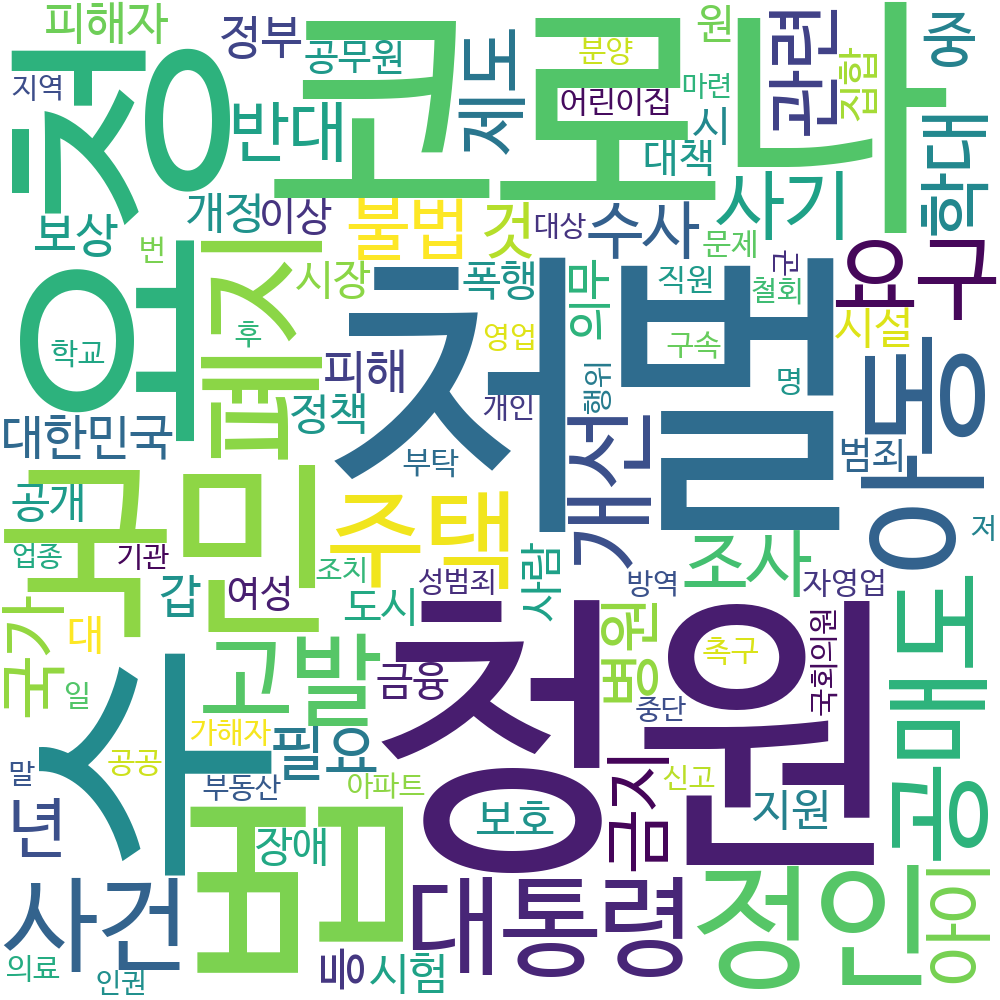

In [ ]:
import cv2
img = cv2.imread('wc_title.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#### 3. 마스크 이미지에 워드 클라우드 생성

url에서 이미지 불러오겠습니다

In [ ]:
import requests
from wordcloud import WordCloud, ImageColorGenerator
from google.colab.patches import cv2_imshow
 
# 마스크 이미지를 url에서 불러오기
url = 'https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png'
resp = requests.get(url)

with open('twitter_mask.png', 'wb') as f:
    f.write(resp.content)

In [ ]:
resp.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe8\x00\x00\x03(\x08\x06\x00\x00\x00\\K\xcaP\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0b\x13\x00\x00\x0b\x13\x01\x00\x9a\x9c\x18\x00\x00\x04%iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="XMP Core 5.4.0">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:tiff="http://ns.adobe.com/tiff/1.0/"\n            xmlns:exif="http://ns.adobe.com/exif/1.0/"\n            xmlns:dc="http://purl.org/dc/elements/1.1/"\n            xmlns:xmp="http://ns.adobe.com/xap/1.0/">\n         <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n         <tiff:Compression>5</tiff:Compression>\n         <tiff:XResolution>72</tiff:XResolution>\n         <tiff:Orientation>1</tiff:Orientation>\n         <tiff:YResolution>72</tiff:YResolution>\n         <exif:PixelXDimension>1000</exif:PixelXDimension>\n         <exif:ColorSpace>

In [ ]:
import cv2
img = cv2.imread('twitter_mask.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)
img

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

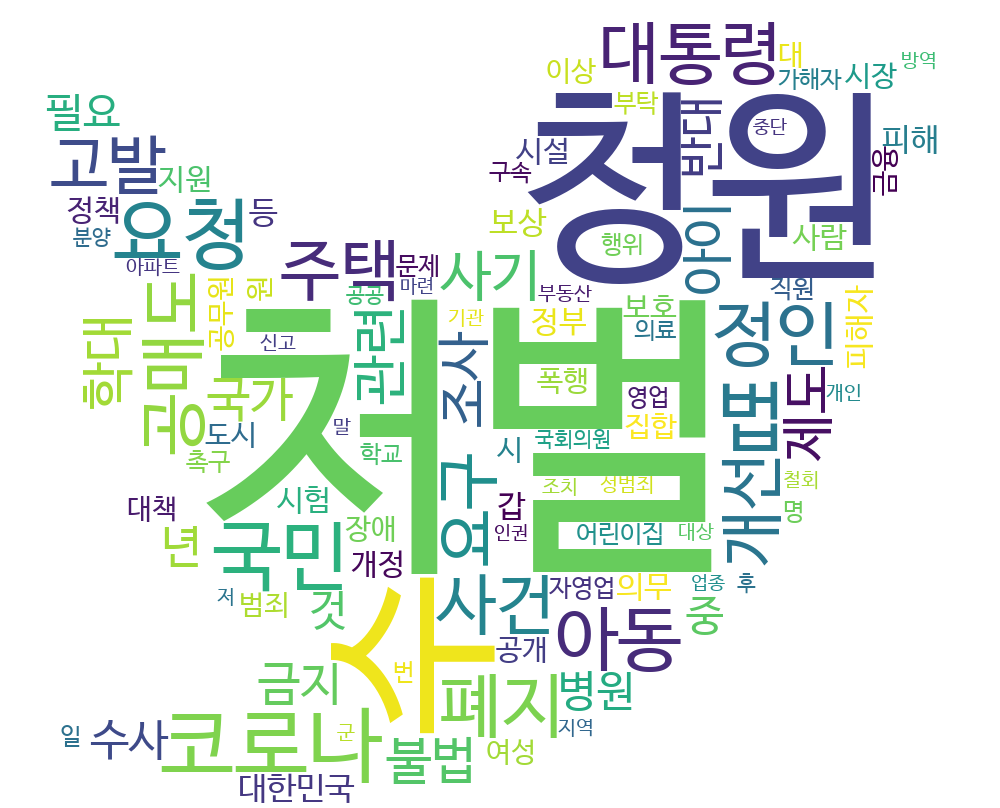

In [ ]:
mask = np.array(img)

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
             background_color='white', 
             mask = mask,
             width = mask.shape[1], height = mask.shape[0], max_words=100, max_font_size=300).generate_from_frequencies(dict(count))
wc.to_file("wc_title_with_mask.png")

img = cv2.imread('wc_title_with_mask.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)